# 📊 Aula: Testes de Normalidade Não Paramétricos

## 🔍 Diferença Entre Testes de Normalidade Paramétricos vs. Não Paramétricos

**🔹 Testes Paramétricos de Normalidade**

* O que são? Testes estatísticos que assumem que os dados seguem uma distribuição normal (ou outra distribuição específica).

* Objetivo: Verificar se um conjunto de dados pode ser modelado por uma distribuição normal.

* Exemplos: Shapiro-Wilk, Kolmogorov-Smirnov (com parâmetros conhecidos, Anderson-Darling

**🔹 Testes Não Paramétricos de Normalidade**

* O que são? Testes que não assumem nenhuma distribuição específica para os dados.

* Objetivo: Verificar se os dados se desviam significativamente de uma distribuição normal, sem depender de parâmetros fixos.

* Exemplos: Teste de Lilliefors (modificação do K-S para média e variância desconhecidas), Teste de Cramér-von Mises

## 🧪 Principais Diferenças

| Critério                     | Testes Paramétricos de Normalidade 📏         | Testes Não Paramétricos de Normalidade 📉      |
|------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Suposição inicial**        | Assume que os dados devem se ajustar a uma distribuição normal | Não assume distribuição específica |
| **Robustez**                 | Menos robusto com outliers ❌                 | Mais robusto com outliers ✅                  |
| **Uso de parâmetros**        | Baseia-se em média e desvio padrão conhecidos | Não depende de parâmetros fixos              |
| **Aplicação típica**         | Quando se espera normalidade (ex.: testes *t*, ANOVA) | Quando a distribuição é desconhecida ou há outliers |
| **Exemplo em saúde**         | Verificar se níveis de glicose são normais    | Analisar escalas de dor (dados ordinais/não normais) |



## 🔹 Exemplo de Teste Não Paramétrico (Lilliefors - via K-S ajustado)

Suponha que: Esses dados representem o tempo até pacientes deixarem a UTI após cirurgia. A normalidade sugere que a maioria se recupera em ~11 horas (±8h), com alguns casos extremos (25h).


Aplicação:
* Se fosse não normal, usaríamos testes não paramétricos (ex.: Wilcoxon para comparações).
* Como é normal, poderíamos usar teste *t* ou ANOVA, se aplicável.


In [10]:
from statsmodels.stats.diagnostic import lilliefors
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# Dados de tempo de recuperação (horas) - possivelmente não normais
tempo_recuperacao = np.array([2, 5, 10, 15, 3, 8, 20, 25])

In [3]:
# --- Passo 1: Análise Descritiva ---
print(f"Média: {np.mean(tempo_recuperacao):.2f} horas")
print(f"Desvio padrão: {np.std(tempo_recuperacao):.2f} horas")

Média: 11.00 horas
Desvio padrão: 7.78 horas


In [6]:
# --- Passo 2: Teste de Lilliefors ---
stat, p = lilliefors(tempo_recuperacao)
print(f"\nEstatística do teste: {stat:.4f}")
print(f"p-valor: {p:.4f}")


Estatística do teste: 0.1729
p-valor: 0.6863


OBS: Por que usar o Lilliefors? Quando você não conhece os parâmetros da população (média/desvio padrão). Para dados com possíveis outliers. Como alternativa ao Shapiro-Wilk em amostras pequenas.

In [12]:
# --- Passo 3: Interpretação ---
alpha = 0.05  # Nível de significância
if p > alpha:
    print("\n✅ Resultado: Os dados parecem normais (não rejeitamos H₀)")
else:
    print("\n❌ Resultado: Os dados NÃO são normais (rejeitamos H₀)")


✅ Resultado: Os dados parecem normais (não rejeitamos H₀)


Comparando com α = 0.05:
* p-valor (0.686) > α (0.05) → Não rejeitamos H₀.
* Conclusão: Não há evidências suficientes para afirmar que os dados não são normais.



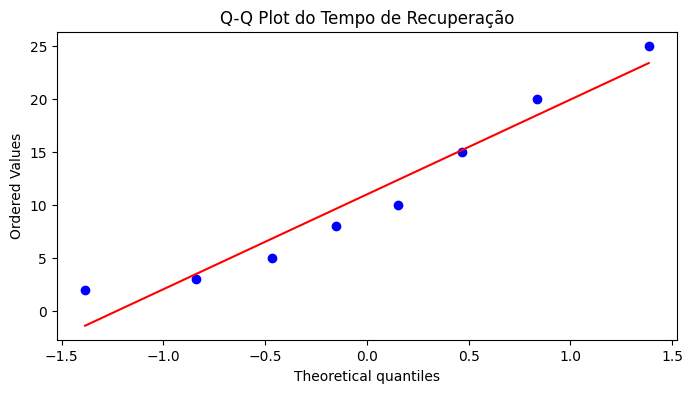

In [13]:
# --- Passo 4: Visualização com QQ-Plot ---
plt.figure(figsize=(8, 4))
stats.probplot(tempo_recuperacao, plot=plt)
plt.title('Q-Q Plot do Tempo de Recuperação')
plt.show()

O gráfico mostra:
* Pontos próximos à linha reta → Indica normalidade.
* Ausência de padrões sistemáticos nos resíduos.